# Append street network data from OSM

In [2]:
import pandas as pd
import geopandas as gp
import os

In [7]:
# run append_osmnx.py to download and append OSM street network data

In [3]:
ls_df = []
read_folder = './sample_data/snapped'
for name in os.listdir(read_folder):
    if name != '.DS_Store':
        read_path = os.path.join(read_folder, name)
        if os.path.isfile(read_path):
            df = pd.read_csv(read_path)
            ls_df.append(df) 
snapped = pd.concat(ls_df).drop(columns=['Unnamed: 0']).reset_index(drop=True)
snapped.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pt_idx        2300 non-null   int64  
 1   line_i        2300 non-null   int64  
 2   index         2300 non-null   int64  
 3   u             2300 non-null   int64  
 4   v             2300 non-null   int64  
 5   key           2300 non-null   int64  
 6   osmid         2300 non-null   object 
 7   lanes         968 non-null    object 
 8   name          1779 non-null   object 
 9   highway       2300 non-null   object 
 10  maxspeed      1646 non-null   object 
 11  oneway        2300 non-null   bool   
 12  length        2300 non-null   float64
 13  from          2300 non-null   int64  
 14  to            2300 non-null   int64  
 15  road_width    1480 non-null   object 
 16  tunnel        226 non-null    object 
 17  service       62 non-null     object 
 18  ref           148 non-null  

## Calculate type_highway

In [4]:
snapped['highway'].value_counts()

residential                                   957
footway                                       675
tertiary                                      400
primary                                        97
['footway', 'steps']                           52
living_street                                  30
trunk                                          22
service                                        18
['footway', 'pedestrian', 'living_street']     15
path                                           14
pedestrian                                      8
['path', 'pedestrian']                          6
cycleway                                        4
steps                                           2
Name: highway, dtype: int64

In [5]:
import ast

def str_to_list(row):
    highway = row['highway']
    if '[' in highway:
        ls = ast.literal_eval(highway)
        return ls
    else:
        return [highway]

In [6]:
snapped['ls_highway'] = snapped.apply(lambda row: str_to_list(row), axis=1)
snapped.head()

,pt_idx,line_i,index,u,v,key,osmid,lanes,name,highway,...,capital,population,continent,lat,lon,snap_dist,l_geom_wkt,og_pt_wkt,snp_pt_wkt,ls_highway
0,0,18859,18859,4141747341,4362198429,0,"[432575528, 432575531]",NaN,Tübinger Straße,residential,...,admin,630305.0,Europe,48.768944,9.171621,0.619205,LINESTRING (512606.1401036462 5401777.65631717...,POINT (512610.7238722896 5401785.053810268),POINT (512610.1756514444 5401785.341678506),[residential]
1,1,1289,1289,18240911,874512131,0,"[548746472, 697876495]",5,Rotebühlplatz,residential,...,admin,630305.0,Europe,48.774710,9.172372,6.023653,LINESTRING (512649.5374798771 5402431.32727952...,POINT (512664.45854201895 5402426.170440706),POINT (512660.5899477974 5402421.553258727),[residential]
2,2,9441,9441,352864054,425953452,0,9719608,NaN,Silberburgstraße,residential,...,admin,630305.0,Europe,48.769644,9.169775,0.374744,LINESTRING (512455.799611573 5401902.709707683...,POINT (512474.95302091 5401862.568986009),POINT (512474.6134750683 5401862.4104239065),[residential]
3,3,11445,11445,803772328,1343655776,0,"[779141058, 122461805]",3,Silberburgstraße,tertiary,...,admin,630305.0,Europe,48.773321,9.167029,3.807493,LINESTRING (512282.11487182026 5402258.7535379...,POINT (512272.2402529773 5402270.8514428055),POINT (512275.66703257116 5402272.51101723),[tertiary]
4,4,850,850,3213216,3653281878,0,32812908,2,Tübinger Straße,residential,...,admin,630305.0,Europe,48.764962,9.168434,0.871468,LINESTRING (512365.80433983426 5401326.3393102...,POINT (512377.5602107154 5401341.964424512),POINT (512376.78696470894 5401342.366353579),[residential]


In [9]:
snapped['highway2'] = snapped['ls_highway'].apply(lambda ls: ls[0])

In [10]:
snapped['highway2'].value_counts()[:20]

residential      957
footway          742
tertiary         400
primary           97
living_street     30
trunk             22
path              20
service           18
pedestrian         8
cycleway           4
steps              2
Name: highway2, dtype: int64

<AxesSubplot:ylabel='highway2'>

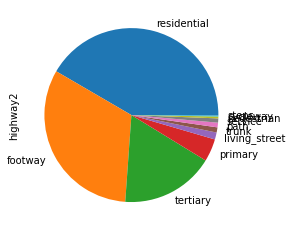

In [11]:
snapped['highway2'].value_counts(normalize=True).plot(kind='pie')

In [12]:
snapped['highway2'].unique().tolist()

['residential',
 'tertiary',
 'footway',
 'living_street',
 'path',
 'primary',
 'service',
 'pedestrian',
 'cycleway',
 'trunk',
 'steps']

In [13]:
d = {
    'residential': 'drive',
    'footway': 'walk',
    'motorway': 'drive', 
    'cycleway': 'cycle',
    'corridor': 'walk',
    'tertiary': 'drive',
    'primary': 'drive',
    'trunk': 'drive',
    'pedestrian': 'walk',
    'secondary': 'drive',
    'service': 'drive',
    'path': 'walk/cycle',
    'unclassified': 'drive',
    'trunk_link': 'drive',
    'primary_link': 'drive',
    'motorway_link': 'drive',
    'busway': 'drive',
    'tertiary_link': 'drive',
    'living_street': 'walk/cycle',
    'steps': 'walk',
    'bridleway': 'others',
    'secondary_link': 'drive',
    'track': 'others',
    'bus_stop': 'drive',
    'crossing': 'walk',
    'elevator': 'others',
    'razed': 'others',
    'busway': 'drive',
    'road': 'drive',
    'rest_area': 'drive',
    'bus_guideway': 'drive'
}

In [14]:
[a for a in snapped['highway2'].unique().tolist() if a not in list(d.keys())]

[]

In [15]:
snapped['type_highway'] = snapped['highway2'].apply(lambda x: d[x])

In [16]:
snapped['type_highway'].value_counts()

drive         1494
walk           752
walk/cycle      50
cycle            4
Name: type_highway, dtype: int64

<AxesSubplot:ylabel='type_highway'>

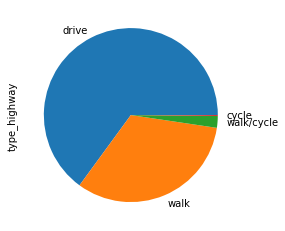

In [17]:
snapped['type_highway'].value_counts(normalize=True).plot(kind='pie')

In [18]:
snapped

,pt_idx,line_i,index,u,v,key,osmid,lanes,name,highway,...,continent,lat,lon,snap_dist,l_geom_wkt,og_pt_wkt,snp_pt_wkt,ls_highway,highway2,type_highway
0,0,18859,18859,4141747341,4362198429,0,"[432575528, 432575531]",NaN,Tübinger Straße,residential,...,Europe,48.768944,9.171621,0.619205,LINESTRING (512606.1401036462 5401777.65631717...,POINT (512610.7238722896 5401785.053810268),POINT (512610.1756514444 5401785.341678506),[residential],residential,drive
1,1,1289,1289,18240911,874512131,0,"[548746472, 697876495]",5,Rotebühlplatz,residential,...,Europe,48.774710,9.172372,6.023653,LINESTRING (512649.5374798771 5402431.32727952...,POINT (512664.45854201895 5402426.170440706),POINT (512660.5899477974 5402421.553258727),[residential],residential,drive
2,2,9441,9441,352864054,425953452,0,9719608,NaN,Silberburgstraße,residential,...,Europe,48.769644,9.169775,0.374744,LINESTRING (512455.799611573 5401902.709707683...,POINT (512474.95302091 5401862.568986009),POINT (512474.6134750683 5401862.4104239065),[residential],residential,drive
3,3,11445,11445,803772328,1343655776,0,"[779141058, 122461805]",3,Silberburgstraße,tertiary,...,Europe,48.773321,9.167029,3.807493,LINESTRING (512282.11487182026 5402258.7535379...,POINT (512272.2402529773 5402270.8514428055),POINT (512275.66703257116 5402272.51101723),[tertiary],tertiary,drive
4,4,850,850,3213216,3653281878,0,32812908,2,Tübinger Straße,residential,...,Europe,48.764962,9.168434,0.871468,LINESTRING (512365.80433983426 5401326.3393102...,POINT (512377.5602107154 5401341.964424512),POINT (512376.78696470894 5401342.366353579),[residential],residential,drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2314,11907,11907,4816030293,5138687764,0,"[149654680, 528903517]",NaN,NaN,footway,...,Asia,1.316398,103.817244,0.151044,LINESTRING (368432.05891932675 145540.71297633...,POINT (368413.9930983515 145533.014224367),POINT (368414.0427977384 145532.87159137888),[footway],footway,walk
2296,2315,12645,12645,5138702697,7386404874,0,47248795,NaN,NaN,footway,...,Asia,1.311636,103.814428,0.913336,LINESTRING (368118.2006524552 145025.280275468...,POINT (368100.3722397656 145006.66408360426),POINT (368099.4632671495 145006.75325014937),[footway],footway,walk
2297,2316,2727,2727,1110031600,7386404874,0,47248795,NaN,NaN,footway,...,Asia,1.312054,103.814562,6.324294,LINESTRING (368118.2006524552 145025.280275468...,POINT (368115.31661246903 145052.90358173128),POINT (368109.52651719726 145050.35967035),[footway],footway,walk
2298,2317,2726,2726,1110031600,1110034484,0,47248795,NaN,NaN,footway,...,Asia,1.312430,103.814390,3.279867,LINESTRING (368092.10955241136 145099.31990112...,POINT (368096.23553250823 145094.41595794976),POINT (368092.9987175631 145093.8862810471),[footway],footway,walk


In [19]:
snapped.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pt_idx        2300 non-null   int64  
 1   line_i        2300 non-null   int64  
 2   index         2300 non-null   int64  
 3   u             2300 non-null   int64  
 4   v             2300 non-null   int64  
 5   key           2300 non-null   int64  
 6   osmid         2300 non-null   object 
 7   lanes         968 non-null    object 
 8   name          1779 non-null   object 
 9   highway       2300 non-null   object 
 10  maxspeed      1646 non-null   object 
 11  oneway        2300 non-null   bool   
 12  length        2300 non-null   float64
 13  from          2300 non-null   int64  
 14  to            2300 non-null   int64  
 15  road_width    1480 non-null   object 
 16  tunnel        226 non-null    object 
 17  service       62 non-null     object 
 18  ref           148 non-null  

In [20]:
osm = pd.read_csv('./sample_data/02_metadata_common_attributes.csv')[['uuid', 'source', 'orig_id']]

In [21]:
osm = osm.merge(snapped.drop(columns=['source', 'orig_id']), on='uuid', how='left')
osm.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          2319 non-null   object 
 1   source        2319 non-null   object 
 2   orig_id       2319 non-null   int64  
 3   pt_idx        2300 non-null   float64
 4   line_i        2300 non-null   float64
 5   index         2300 non-null   float64
 6   u             2300 non-null   float64
 7   v             2300 non-null   float64
 8   key           2300 non-null   float64
 9   osmid         2300 non-null   object 
 10  lanes         968 non-null    object 
 11  name          1779 non-null   object 
 12  highway       2300 non-null   object 
 13  maxspeed      1646 non-null   object 
 14  oneway        2300 non-null   object 
 15  length        2300 non-null   float64
 16  from          2300 non-null   float64
 17  to            2300 non-null   float64
 18  road_width    1480 non-null 

In [27]:
cols = ['uuid',
 'source',
 'orig_id',
 'snap_dist',
 'u',
 'v',
 'key',
 'osmid',
 'oneway',
 'lanes',
 'name',
 'highway',
 'type_highway',
 'maxspeed',
 'junction',
 'length',
 'from',
 'to',
 'ref',
 'tunnel',
 'bridge',
 'service',
 'access',
 'road_width',
 'est_width']
osm = osm[cols]

In [28]:
osm.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          2319 non-null   object 
 1   source        2319 non-null   object 
 2   orig_id       2319 non-null   int64  
 3   snap_dist     2300 non-null   float64
 4   u             2300 non-null   float64
 5   v             2300 non-null   float64
 6   key           2300 non-null   float64
 7   osmid         2300 non-null   object 
 8   oneway        2300 non-null   object 
 9   lanes         968 non-null    object 
 10  name          1779 non-null   object 
 11  highway       2300 non-null   object 
 12  type_highway  2300 non-null   object 
 13  maxspeed      1646 non-null   object 
 14  junction      0 non-null      float64
 15  length        2300 non-null   float64
 16  from          2300 non-null   float64
 17  to            2300 non-null   float64
 18  ref           148 non-null  

In [30]:
osm.to_csv('./sample_data/10_osm.csv', index=False)